In [ ]:
!pip install scienceplots

In [10]:
!git clone https://github.com/DCI-alxogm/ml2023-PotterSR.git

Cloning into 'ml2023-PotterSR'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 126 (delta 40), reused 102 (delta 20), pack-reused 0
Receiving objects: 100% (126/126), 3.04 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import scienceplots
plt.style.use(['science', 'no-latex'])

In [11]:
houses = np.loadtxt('/content/ml2023-PotterSR/Data/houses.txt', delimiter = ',')
Xh = houses[:,:4]
th = houses[:, 4]

labels = ['Size', 'Rooms', 'Floors', 'Years']

In [12]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh) #Normalizamos los datos

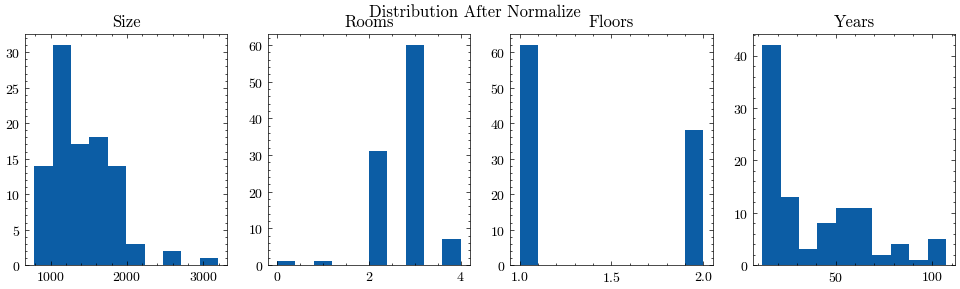

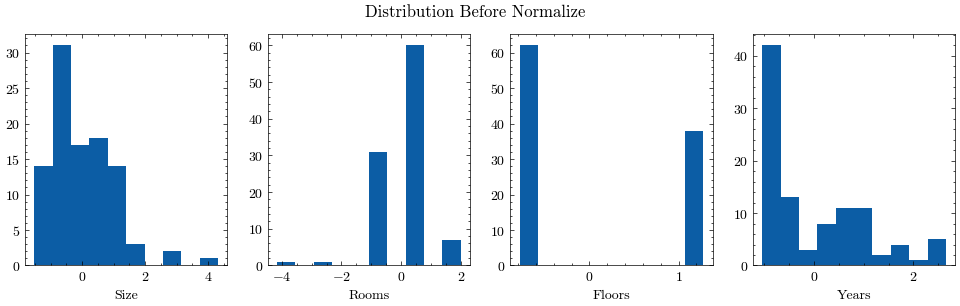

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    ax[i].hist(Xh[:, i]);
    ax[i].set_title(labels[i]);
fig.suptitle('Distribution After Normalize')
plt.show()


fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i]);
    ax[i].set_xlabel(labels[i]);
fig.suptitle('Distribution Before Normalize')
plt.show()

In [14]:
sgdr = SGDRegressor(max_iter = 1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)

print(sgdr)
print(f'Number of iterations completed:  {sgdr.n_iter_}, number of weight updates: {sgdr.t_}')

SGDRegressor(learning_rate='constant')
Number of iterations completed:  33, number of weight updates: 3301.0


In [15]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w0_norm}, b:{w_norm}")

model parameters:  w: [361.84119773], b:[110.62144946 -21.60945128 -32.62700888 -38.44809958]


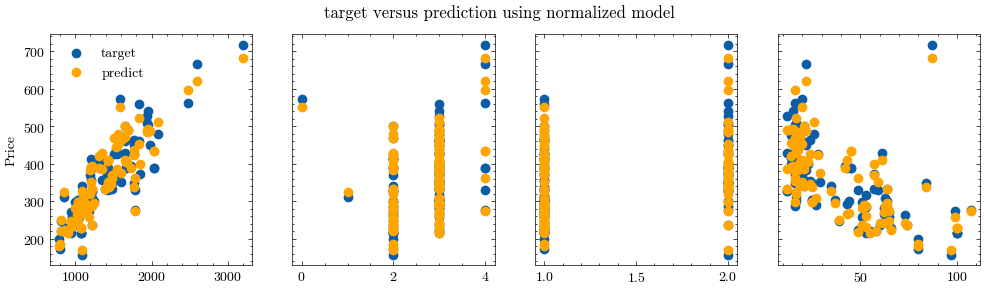

In [16]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [18]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
coeffs =sgdr.coef_
intercept = sgdr.intercept_

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 33, number of weight updates: 2311.0


In [19]:
sgdr.score(X_test, y_test)

0.9615281075038129

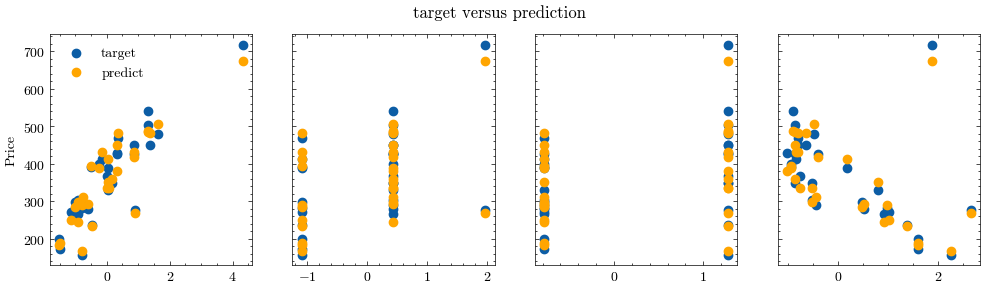

In [20]:
yp = intercept[0]
for i in range(len(w_norm)):
  yp+=coeffs[i]*X_test[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].scatter(X_test[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction")
plt.show()

## Usando Keras SGD

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)

model = Sequential()

In [22]:
input_dim = 4
output_dim = 1

model.add(Dense(output_dim, input_dim = input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)

model.compile(loss = 'mse', optimizer = sgd)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
num_epochs = 100
batch_size = X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 140377.0469
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 134793.5781
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 129438.3281
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 124301.7266
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 119374.6406
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 114648.3516
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 110114.4766
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 105765.0234
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 101592.3516
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 97589.0938
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - loss: 93748.2656
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 90063

In [24]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 59.061714  ]
 [  0.57608724]
 [-14.79882   ]
 [-49.55346   ]] [312.6024]


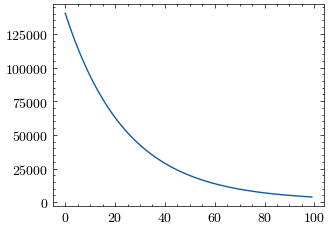

In [25]:
history_df = pd.DataFrame(history.history)

history_df['loss'].plot();

In [26]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 13ms/step - loss: 3802.4897
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 3699.3909
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 3600.0447
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 3504.3062
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 3412.0325
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 3323.0898
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 3237.3499
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 3154.6853
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 3074.9800
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 2998.1167
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 2923.9880
Epoch 12/100
1/1 [==============================] - 0s 13ms/step - loss: 2852.4863
Epoch 13/100


In [27]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 82.353645]
 [ -9.564008]
 [-23.690283]
 [-47.320885]] [354.1073]


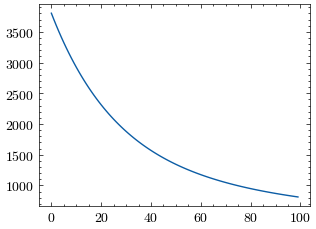

In [28]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
score

1178.2459716796875

In [33]:
yp = model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


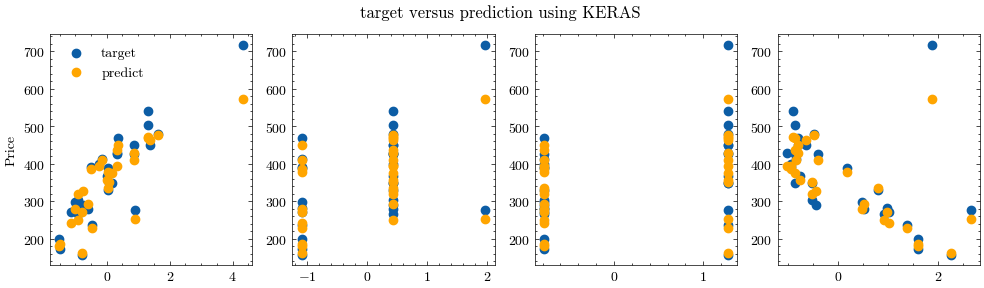

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].scatter(X_test[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using KERAS")
plt.show()